# New Platform, EDA & Basic ML Automation

In [34]:
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as sp
from scipy.stats import norm
from scipy.stats import skew
from numpy.random import seed
import warnings
warnings.filterwarnings('ignore')

## 1. train/test dataset load

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


## 2. train dataset 구조 분석
 - train과 test data 동시 loading 및 전처리해나간다.

In [4]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [9]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

- missing data drop

In [12]:
train = train.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() 

0

In [13]:
test = test.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
test.isnull().sum().max() 

4

In [14]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test2.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


In [15]:
train=train.drop(["Id"], axis=1)
test=test.drop(["Id"], axis=1)

In [17]:
print(train.shape)
print(test.shape)

(1459, 62)
(1459, 61)


In [18]:
test.fillna(test.mean(),inplace=True)

In [19]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test3 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test3.head(10)

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
KitchenQual,1,0.000685
Exterior1st,1,0.000685
SaleType,1,0.000685
Exterior2nd,1,0.000685
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
RoofStyle,0,0.000000


In [20]:
train=train.drop(["MSZoning","Functional","Utilities", "KitchenQual","Exterior1st", "SaleType", "Exterior2nd"  ], axis=1)
test=test.drop(["MSZoning","Functional","Utilities", "KitchenQual","Exterior1st", "SaleType", "Exterior2nd"  ], axis=1)

In [21]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test4 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test4.head(2)

,Total,Percent
SaleCondition,0,0.0
OverallCond,0,0.0


## 3. target value 분석

In [22]:
train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

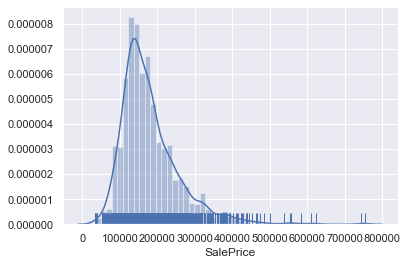

In [23]:
sns.distplot(train['SalePrice'], rug=True);
plt.show()

In [24]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881943
Kurtosis: 6.529263


In [25]:
original_SalePrice = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])

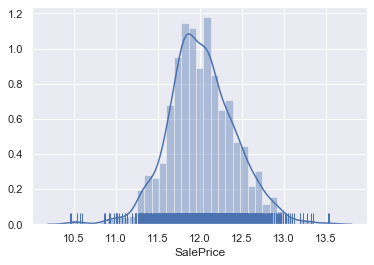

In [26]:
sns.distplot(train['SalePrice'], rug=True);
plt.show()

- ouliers 제거

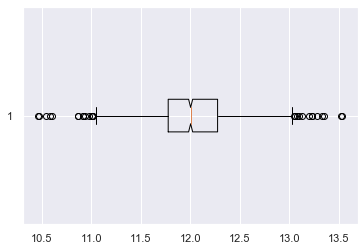

In [27]:
plt.boxplot(train['SalePrice'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

In [28]:
train['SalePrice'].describe()

count    1459.000000
mean       12.024054
std         0.399586
min        10.460271
25%        11.774913
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [29]:
cond1 = train['SalePrice'] > 13
outlier_index = train[cond1].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
 
train.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [ 178  185  440  527  591  691  769  798  803  898 1046 1169 1182 1243
 1373]
아웃라이어 삭제 전 : (1459, 55)
아웃라이어 삭제 후 : (1444, 55)


In [30]:
cond1 = train['SalePrice'] < 11.0271585
outlier_index = train[cond1].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)

train.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [  30  375  410  495  533  636  705  710  812  916  968 1100 1325 1337
 1380]
아웃라이어 삭제 전 : (1444, 55)
아웃라이어 삭제 후 : (1429, 55)


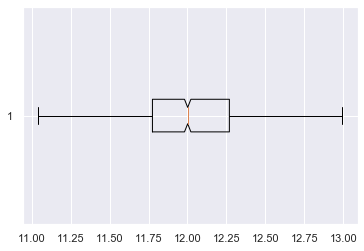

In [31]:
plt.boxplot(train['SalePrice'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

## 4. skewness 확인 및 변수 추가 제거

In [35]:
features_index = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          25.224522
PoolArea         15.905445
LotArea          12.424014
3SsnPorch        10.180911
LowQualFinSF      9.092022
KitchenAbvGr      4.468915
BsmtFinSF2        4.226498
ScreenPorch       4.130387
BsmtHalfBath      4.079738
EnclosedPorch     3.080073
OpenPorchSF       2.261681
BsmtFinSF1        1.704607
TotalBsmtSF       1.569394
WoodDeckSF        1.544347
1stFlrSF          1.411044
MSSubClass        1.388339
GrLivArea         1.238304
dtype: float64


In [36]:
train[skew_features_top.index] = np.log1p(train[skew_features_top.index])
test[skew_features_top.index] = np.log1p(test[skew_features_top.index])

In [37]:
features_index = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         15.348136
3SsnPorch         7.640431
LowQualFinSF      7.523583
MiscVal           5.192206
BsmtHalfBath      3.908464
KitchenAbvGr      3.844346
ScreenPorch       3.174707
BsmtFinSF2        2.493773
EnclosedPorch     2.107497
dtype: float64


In [38]:
skew_features_top.index

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [39]:
train=train.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal'], axis=1)
test=test.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal'], axis=1)

In [40]:
print(train.shape)
print(test.shape)

(1429, 46)
(1459, 45)


## 5. 중요 변수 GrLivArea ouliers 제거

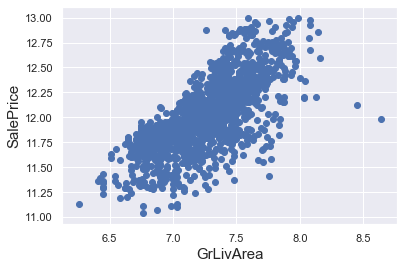

In [42]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [43]:
train['GrLivArea'].describe()

count    1429.000000
mean        7.267496
std         0.319865
min         6.255750
25%         7.034388
50%         7.289611
75%         7.478170
max         8.638171
Name: GrLivArea, dtype: float64

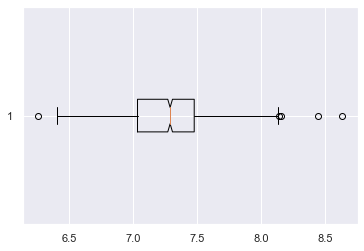

In [44]:
plt.boxplot(train['GrLivArea'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

In [45]:
cond1 = train['GrLivArea'] > 8.143843
outlier_index = train[cond1].index
print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
train.drop(outlier_index, axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [ 304  523 1268 1298]
아웃라이어 삭제 전 : (1429, 46)
아웃라이어 삭제 후 : (1425, 46)


In [46]:
cond1 = train['GrLivArea'] < 6.3
outlier_index = train[cond1].index
print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
train.drop(outlier_index, axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [29]
아웃라이어 삭제 전 : (1425, 46)
아웃라이어 삭제 후 : (1424, 46)


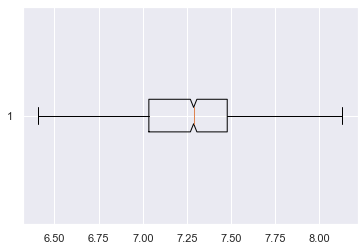

In [47]:
plt.boxplot(train['GrLivArea'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

## 6. 상관계수 분석

In [48]:
column_cont=[]
temp=[]
for i in range(0,46):
    xxx=train.columns[i]
    if train[xxx].dtypes!=object:
        temp=xxx
        column_cont.append(temp)   

In [60]:
corr_abs=abs(train[column_cont].corr())

In [50]:
de_feature=[]
for i in range(0,25):
    for n in range(1,25-i):
        k=n+i
        if corr_abs.iloc[i,k]>=0.7:
            temp=corr_abs.columns[n]
            de_feature.append(temp)

In [51]:
de_feature

['MoSold', 'YearRemodAdd', 'FullBath', 'LotArea']

In [61]:
corr_abs['SalePrice']

MSSubClass      0.037340
LotArea         0.386159
OverallQual     0.803561
OverallCond     0.091320
YearBuilt       0.596819
YearRemodAdd    0.555201
BsmtFinSF1      0.187478
BsmtUnfSF       0.219550
TotalBsmtSF     0.361111
1stFlrSF        0.580773
2ndFlrSF        0.291551
GrLivArea       0.712343
BsmtFullBath    0.237366
FullBath        0.576718
HalfBath        0.296109
BedroomAbvGr    0.174835
TotRmsAbvGrd    0.492140
Fireplaces      0.475976
GarageCars      0.660252
GarageArea      0.631602
WoodDeckSF      0.331657
OpenPorchSF     0.463615
MoSold          0.061934
YrSold          0.028219
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [65]:
de_feature2=['MSSubClass', 'OverallCond','BsmtFinSF1', 'BsmtUnfSF', 
           'YrSold' ]

In [66]:
train=train.drop(de_feature, axis=1)
test=test.drop(de_feature, axis=1)

KeyError: "['MoSold' 'YearRemodAdd' 'FullBath' 'LotArea'] not found in axis"

In [67]:
train=train.drop(de_feature2, axis=1)
test=test.drop(de_feature2, axis=1)

In [68]:
train.head()

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,3,8,0,2,548,Y,0.000000,4.127134,Normal,12.247699
1,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,3,6,1,2,460,Y,5.700444,0.000000,Normal,12.109016
2,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,3,6,1,2,608,Y,0.000000,3.761200,Normal,12.317171
3,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,3,7,1,3,642,Y,0.000000,3.583519,Abnorml,11.849405
4,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,4,9,1,3,836,Y,5.262690,4.442651,Normal,12.429220


## 7. one hot encoding

In [70]:
all_data = pd.concat((train, test))

In [71]:
print(all_data.shape)
print(train.shape)
print(test.shape)

(2883, 37)
(1424, 37)
(1459, 36)


In [72]:
all_data2=pd.get_dummies(all_data)

In [73]:
train2=all_data2.iloc[:1424,:]

In [74]:
test2=all_data2.iloc[1424:,:]

In [75]:
print(train2.shape)
print(test2.shape)

(1424, 144)
(1459, 144)


In [76]:
test2=test2.drop(['SalePrice'], axis=1)

In [77]:
test2.shape

(1459, 143)

## 8. 분석 시작

In [78]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.externals import joblib   # 함수는 dump 시켜도 안됨
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [83]:
knn = KNeighborsRegressor(n_neighbors=5)
linear = LinearRegression()
sgd = SGDRegressor(max_iter=None, eta0=0.01, penalty='l2', random_state=30)
ridge = Ridge(alpha=1, random_state=30)
lasso = Lasso(alpha=1, random_state=30)
elastic = ElasticNet(alpha=1, l1_ratio=0.5, random_state=30)
dt = DecisionTreeRegressor(max_depth=None, random_state=30)
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=30, n_jobs=-1)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=30)
svm = SVR(C=1, kernel='rbf', gamma='auto_deprecated')
mlp = MLPRegressor(hidden_layer_sizes=[100], solver='adam', activation='relu', alpha=0.0001, max_iter=200, random_state=30)
xgb = XGBRegressor(random_state=30)

In [105]:
models = {
    'knn' : knn,
    'linear' : linear,
#    'sgd' : sgd,
    'ridge' : ridge,
    'lasso' : lasso,
    'elastic' : elastic,
    'dt' : dt,
    'rf' : rf,
    'gb' : gb,
    'xgb' : xgb,
    'svm' : svm,
    'mlp' : mlp
}

In [85]:
y_target =  train2['SalePrice']
X_features = train2.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [93]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

- 일반 성능 평가 

In [130]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
linear = LinearRegression()
linear.fit(X_train, y_train)
sgd = SGDRegressor(max_iter=None, eta0=0.01, penalty='l2', random_state=42)
#sgd.fit(X_train, y_train)
ridge = Ridge(alpha=1, random_state=42)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=1, random_state=42)
lasso.fit(X_train, y_train)
elastic = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic.fit(X_train, y_train)
dt = DecisionTreeRegressor(max_depth=None, random_state=42)
dt.fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
svm = SVR(C=1, kernel='rbf', gamma='auto_deprecated')
svm.fit(X_train, y_train)
mlp = MLPRegressor(hidden_layer_sizes=[100], solver='adam', activation='relu', alpha=0.0001, max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

[20:27:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [131]:
models = {knn,linear,ridge,lasso,elastic,dt,rf,gb,xgb,svm,mlp}

In [132]:
get_rmses(models)

ElasticNet 로그 변환된 RMSE: 0.228
SVR 로그 변환된 RMSE: 0.285
MLPRegressor 로그 변환된 RMSE: 0.854
LinearRegression 로그 변환된 RMSE: 0.119
GradientBoostingRegressor 로그 변환된 RMSE: 0.117
Ridge 로그 변환된 RMSE: 0.118
Lasso 로그 변환된 RMSE: 0.229
DecisionTreeRegressor 로그 변환된 RMSE: 0.214
RandomForestRegressor 로그 변환된 RMSE: 0.13
KNeighborsRegressor 로그 변환된 RMSE: 0.203
XGBRegressor 로그 변환된 RMSE: 0.117


[0.2275811562028742,
 0.28475771559299634,
 0.8537674137090446,
 0.11919324832890837,
 0.11709359933386121,
 0.11811751399075769,
 0.2285555174503597,
 0.21431248862096927,
 0.13027996023235036,
 0.20337745927207973,
 0.11716649357960054]

- corss validatoin 5

In [134]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [135]:
get_avg_rmse_cv(models)


ElasticNet CV RMSE 값 리스트: [0.224 0.249 0.244 0.233 0.238]
ElasticNet CV 평균 RMSE 값: 0.237

SVR CV RMSE 값 리스트: [0.293 0.311 0.284 0.268 0.266]
SVR CV 평균 RMSE 값: 0.284

MLPRegressor CV RMSE 값 리스트: [0.7   0.742 0.618 0.713 0.834]
MLPRegressor CV 평균 RMSE 값: 0.721

LinearRegression CV RMSE 값 리스트: [0.112 0.135 0.141 0.115 0.12 ]
LinearRegression CV 평균 RMSE 값: 0.125

GradientBoostingRegressor CV RMSE 값 리스트: [0.12  0.129 0.138 0.118 0.122]
GradientBoostingRegressor CV 평균 RMSE 값: 0.125

Ridge CV RMSE 값 리스트: [0.11  0.133 0.137 0.115 0.119]
Ridge CV 평균 RMSE 값: 0.123

Lasso CV RMSE 값 리스트: [0.226 0.251 0.245 0.235 0.241]
Lasso CV 평균 RMSE 값: 0.24

DecisionTreeRegressor CV RMSE 값 리스트: [0.191 0.193 0.202 0.188 0.192]
DecisionTreeRegressor CV 평균 RMSE 값: 0.193

RandomForestRegressor CV RMSE 값 리스트: [0.142 0.135 0.144 0.124 0.141]
RandomForestRegressor CV 평균 RMSE 값: 0.137

KNeighborsRegressor CV RMSE 값 리스트: [0.221 0.246 0.229 0.232 0.221]
KNeighborsRegressor CV 평균 RMSE 값: 0.23
[20:32:53] WARNING: C:/Jenki

- grid searchCV

In [133]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_


- 파라미터 최적화

In [140]:
knn_params = { 'n_neighbors' : [ 4, 5, 6, 7 ,8 ,9 ,10, 11, 12, 13, 14, 15]}
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
elastic_params1 = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
elastic_params2 = { 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8 ,0.9] }
mlp_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
gb_params = { 'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8 ,0.9] }

#svm
#dt
#rf
#xgb

best_knn = get_best_params(knn, knn_params)
best_rige = get_best_params(ridge, ridge_params)
best_lasso = get_best_params(lasso, lasso_params)
best_elastic1 = get_best_params(elastic, elastic_params1)
best_elastic2 = get_best_params(elastic, elastic_params2)
best_mlp = get_best_params(mlp, mlp_params)
best_gb= get_best_params(gb, gb_params)

KNeighborsRegressor 5 CV 시 최적 평균 RMSE 값: 0.2271, 최적 alpha:{'n_neighbors': 9}
Ridge 5 CV 시 최적 평균 RMSE 값: 0.1217, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1231, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.1216, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.2239, 최적 alpha:{'l1_ratio': 0.1}
MLPRegressor 5 CV 시 최적 평균 RMSE 값: 0.6684, 최적 alpha:{'alpha': 0.5}
GradientBoostingRegressor 5 CV 시 최적 평균 RMSE 값: 0.1255, 최적 alpha:{'learning_rate': 0.1}


## 9. 결과 예측

In [144]:
y_train2 =  train2['SalePrice']
X_train2 = train2.drop('SalePrice',axis=1, inplace=False)

In [145]:
X_test=test2

In [146]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [141]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
linear = LinearRegression()
linear.fit(X_train, y_train)
sgd = SGDRegressor(max_iter=None, eta0=0.01, penalty='l2', random_state=42)
#sgd.fit(X_train, y_train)
ridge = Ridge(alpha=8, random_state=42)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X_train, y_train)
elastic = ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=42)
elastic.fit(X_train, y_train)
dt = DecisionTreeRegressor(max_depth=None, random_state=42)
dt.fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
svm = SVR(C=1, kernel='rbf', gamma='auto_deprecated')
svm.fit(X_train, y_train)
mlp = MLPRegressor(hidden_layer_sizes=[100], solver='adam', activation='relu', alpha=0.5, max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

[20:43:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [142]:
get_rmses(models)

ElasticNet 로그 변환된 RMSE: 0.228
SVR 로그 변환된 RMSE: 0.285
MLPRegressor 로그 변환된 RMSE: 0.854
LinearRegression 로그 변환된 RMSE: 0.119
GradientBoostingRegressor 로그 변환된 RMSE: 0.117
Ridge 로그 변환된 RMSE: 0.118
Lasso 로그 변환된 RMSE: 0.229
DecisionTreeRegressor 로그 변환된 RMSE: 0.214
RandomForestRegressor 로그 변환된 RMSE: 0.13
KNeighborsRegressor 로그 변환된 RMSE: 0.203
XGBRegressor 로그 변환된 RMSE: 0.117


[0.2275811562028742,
 0.28475771559299634,
 0.8537674137090446,
 0.11919324832890837,
 0.11709359933386121,
 0.11811751399075769,
 0.2285555174503597,
 0.21431248862096927,
 0.13027996023235017,
 0.20337745927207973,
 0.11716649357960054]

In [147]:
get_avg_rmse_cv(models)


ElasticNet CV RMSE 값 리스트: [0.224 0.249 0.244 0.233 0.238]
ElasticNet CV 평균 RMSE 값: 0.237

SVR CV RMSE 값 리스트: [0.293 0.311 0.284 0.268 0.266]
SVR CV 평균 RMSE 값: 0.284

MLPRegressor CV RMSE 값 리스트: [0.7   0.742 0.618 0.713 0.834]
MLPRegressor CV 평균 RMSE 값: 0.721

LinearRegression CV RMSE 값 리스트: [0.112 0.135 0.141 0.115 0.12 ]
LinearRegression CV 평균 RMSE 값: 0.125

GradientBoostingRegressor CV RMSE 값 리스트: [0.12  0.129 0.138 0.118 0.122]
GradientBoostingRegressor CV 평균 RMSE 값: 0.125

Ridge CV RMSE 값 리스트: [0.11  0.133 0.137 0.115 0.119]
Ridge CV 평균 RMSE 값: 0.123

Lasso CV RMSE 값 리스트: [0.226 0.251 0.245 0.235 0.241]
Lasso CV 평균 RMSE 값: 0.24

DecisionTreeRegressor CV RMSE 값 리스트: [0.191 0.193 0.202 0.188 0.192]
DecisionTreeRegressor CV 평균 RMSE 값: 0.193

RandomForestRegressor CV RMSE 값 리스트: [0.142 0.135 0.144 0.124 0.141]
RandomForestRegressor CV 평균 RMSE 값: 0.137

KNeighborsRegressor CV RMSE 값 리스트: [0.221 0.246 0.229 0.232 0.221]
KNeighborsRegressor CV 평균 RMSE 값: 0.23
[20:48:00] WARNING: C:/Jenki

In [148]:
knn_pred= knn.predict(X_test)
lr_reg_pred = linear.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elastic_pred = elastic.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
svm_pred = svm.predict(X_test)
mlp_pred = mlp.predict(X_test)
xgb_pred = xgb.predict(X_test)

In [152]:
back=np.expm1(ridge_pred)

[Text(0.5, 1.0, 'test')]

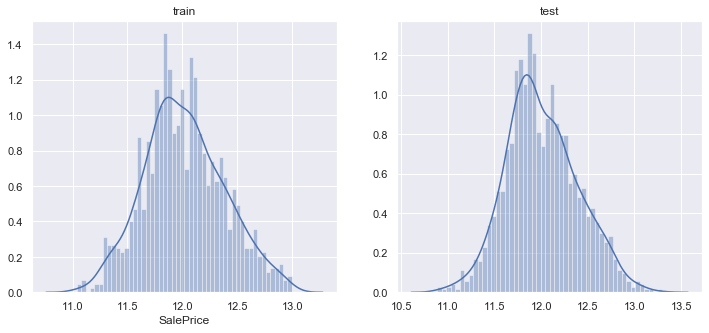

In [154]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(ridge_pred,ax=ax2,bins=50)
ax2.set(title="test")

In [155]:
submission = pd.read_csv("sample_submission.csv")
submission

submission["SalePrice"] = back

print(submission.shape)
submission.head()

(1459, 2)


,Id,SalePrice
0,1461,116255.493893
1,1462,152516.828661
2,1463,163971.397928
3,1464,181056.323137
4,1465,198870.795726


In [156]:
submission.to_csv("submission1.csv", index=False)

In [ ]:
from IPython.display import Image
 
Image("20200304 submission.png")

- stacking/bagging/boosting
- 계층별 CV, 
- Feature engineering 추가 분석 필요

In [157]:
train.head()

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,3,8,0,2,548,Y,0.000000,4.127134,Normal,12.247699
1,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,3,6,1,2,460,Y,5.700444,0.000000,Normal,12.109016
2,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,3,6,1,2,608,Y,0.000000,3.761200,Normal,12.317171
3,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,3,7,1,3,642,Y,0.000000,3.583519,Abnorml,11.849405
4,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,4,9,1,3,836,Y,5.262690,4.442651,Normal,12.429220


In [178]:
train.columns[1]

'LotShape'

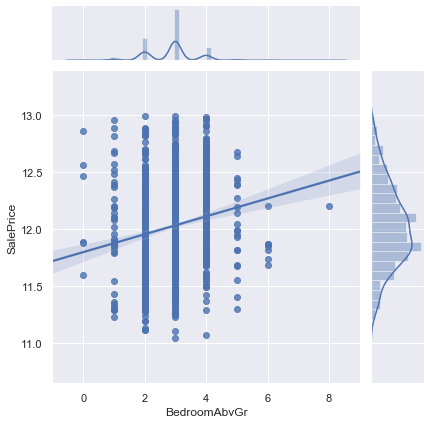

In [185]:
sns.jointplot(data=train, x='BedroomAbvGr', y='SalePrice', kind='reg')